In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

import scipy

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
from imblearn.over_sampling import SMOTE, ADASYN


from scipy.stats.stats import pearsonr

In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])


In [3]:
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X):
    q25 = X.quantile(0.25, axis=0)
    q75 = X.quantile(0.75, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers
 


In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_2_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_2_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_2_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 20)
(1000,)
(1000, 20)


In [7]:
skb = SelectKBest(f_classif, k=1)
# skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function f_classif at 0x114afc378>)

In [8]:
np.sort(skb.scores_)[::-1][:20]

array([  8.53288495e+00,   4.70209371e+00,   2.20846596e+00,
         2.10973204e+00,   1.64955269e+00,   1.48746435e+00,
         8.33332399e-01,   7.30463754e-01,   3.91552534e-01,
         2.62530320e-01,   2.41516117e-01,   2.30449964e-01,
         2.28982740e-01,   1.41075885e-01,   1.06173896e-01,
         6.49618792e-02,   1.91342693e-02,   1.26640245e-02,
         2.46900685e-03,   2.49467464e-04])

In [24]:
skb.k = 2

In [25]:
# X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
X = skb.transform(np.vstack([X_train_load, X_test_load]))
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



In [26]:
# Deleted_parameters = check_outliers(pd.DataFrame(X_train))
# X_train = np.delete(X_train, Deleted_parameters, axis = 0)
# y_train = np.delete(y_train, Deleted_parameters, axis = 0)

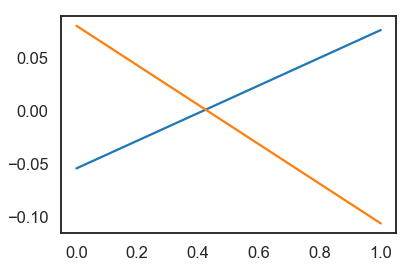

In [27]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0))
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0))

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 2)
(1000,)
(1000, 2)


In [29]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-5090 -1000
491


In [30]:
X_train_new = np.array(X_train)
y_train_new = np.array(y_train)
X_test_new = np.array(X_test)


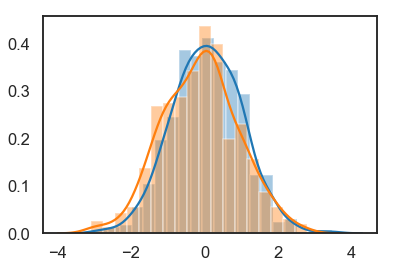

In [32]:
sns.distplot(X_train[np.where(y_train==0)][:,1])
sns.distplot(X_train[np.where(y_train==1)][:,1])

In [17]:
rho = 0.5
Predict = cross_val_predict(estimator=LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}, penalty='l1'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_AUC = LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)






ACC 0.536
AUC 0.553003173028
NUM 464
ASY1 -598
ASY2 140


In [21]:
rho = 0.95
Predict = cross_val_predict(estimator=LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}, penalty='l1'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_ASY1 = LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)






ACC 0.509
AUC 0.553015176917
NUM 491
ASY1 -4599
ASY2 -18


In [22]:
rho = 0.6
Predict = cross_val_predict(estimator=LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}, penalty='l1'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_ASY2 = LogisticRegression(C=10**100, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)









ACC 0.517
AUC 0.553003173028
NUM 483
ASY1 -3980
ASY2 -1


In [23]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_2_answ.csv', sep = ',')
